#### Q1. What is the mathematical formula for a linear SVM?

A linear SVM (Support Vector Machine) is a binary classification algorithm that tries to find the hyperplane that best separates two classes in the input data. The hyperplane is chosen such that it maximizes the margin between the two classes. The mathematical formula for a linear SVM can be written as:

f(x) = w^T x + b

where x is the input data, w is the weight vector, b is the bias term, and f(x) is the decision function.

#### Q2. What is the objective function of a linear SVM?

The objective function of a linear SVM (Support Vector Machine) is a mathematical expression that is used to train the classifier. The objective function of a linear SVM is to find the hyperplane that maximizes the margin between the two classes while also minimizing the classification error on the training data. The objective function for a linear SVM is expressed as:

minimize (1/2) * ||w||^2 + C * sum(i=1 to n) max(0, 1 - y_i * (w^T * x_i + b))

#### Q3. What is the kernel trick in SVM?

A Kernel Trick is a simple method where a Non Linear data is projected into a higher dimension space so as to make it easier to classify the data where it could be linearly divided by a plane

#### Q4. What is the role of support vectors in SVM Explain with example

SVMs are used in applications like handwriting recognition, intrusion detection, face detection, email classification, gene classification, and in web pages. This is one of the reasons we use SVMs in machine learning. It can handle both classification and regression on linear and non-linear data

#### Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in SVM?

### Hyperplane

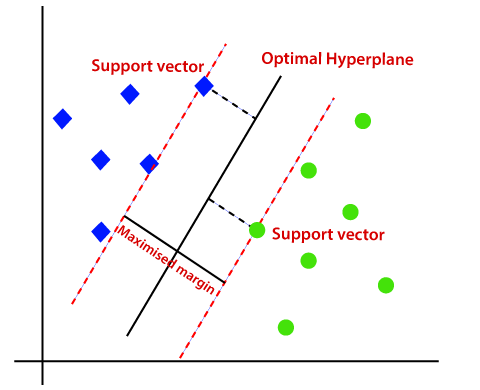

### Marginal plane

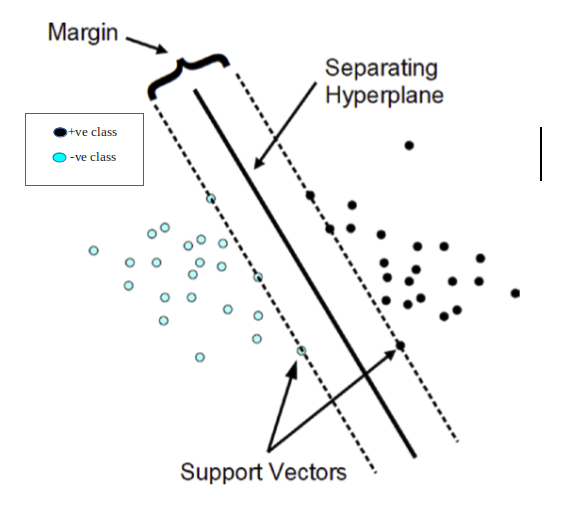

### Hard ans Soft margin

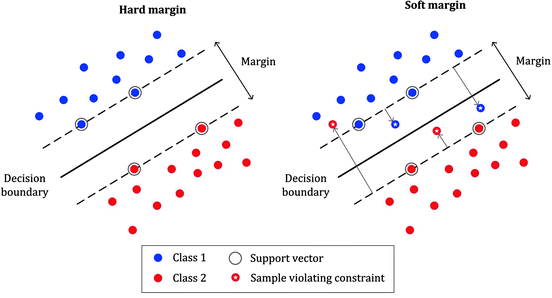

#### Q6. SVM Implementation through Iris dataset.
- Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
- Train a linear SVM classifier on the training set and predict the labels for the testing setl
- Compute the accuracy of the model on the testing setl
- Plot the decision boundaries of the trained model using two of the featuresl
- Try different values of the regularisation parameter C and see how it affects the performance of
  the model.
  

In [3]:
from sklearn.datasets import load_iris
dataset = load_iris()

In [6]:
import pandas as pd
df = pd.DataFrame(data=dataset.data,columns=dataset.feature_names)

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['Target'] = dataset.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
# independent and dependent features
# We are taking only two independent features
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [20]:
# train test and split
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [22]:
# Let's train our model uysing SVC
from sklearn.svm import SVC
svc = SVC(kernel='linear')

In [23]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [24]:
y_pred = svc.predict(X_test)

In [25]:
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [27]:
# Let's check the accuracy of model
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,y_pred)*100)

Accuracy Score:  90.0


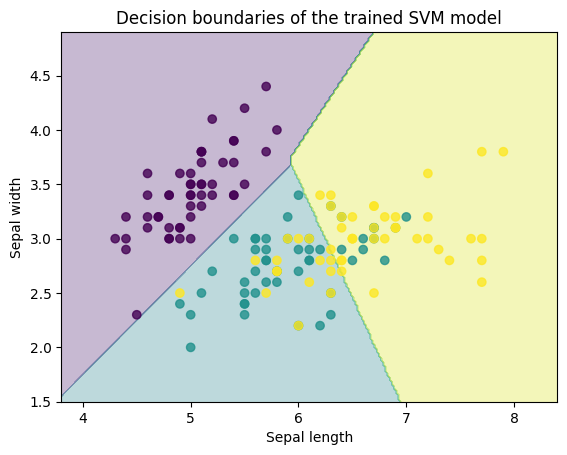

In [36]:
# decision boundary
import warnings
warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

x_min, x_max = df.iloc[:, 0].min() - 0.5, df.iloc[:, 0].max() + 0.5
y_min, y_max = df.iloc[:, 1].min() - 0.5, df.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y, alpha=0.8)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Decision boundaries of the trained SVM model")
plt.show()


### Hyperparameter Tunning

In [50]:
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
grid = GridSearchCV(SVC(),param_grid=parameters,refit=True,cv=5,verbose=3)

In [53]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.708 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.708 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.792 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.708 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.708 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.792 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.833 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.708 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.667 total time=   0.0s
[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.750 total time=   0.0s
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.875 total time=   0.0s
[CV 4/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.833 total time=   0.0s
[CV 5/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.001, kernel=linear;, score=0.667 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.001, kernel=linear;, score=0.750 total time=   0.0s
[CV 3/5] END C=1000, gamma=0.001, kernel=linear;, score=0.875 total time=   0.0s
[CV 4/5] END C=1000, gamma=0.001, kernel=linear;, score=0.833 total time=   0.0s
[CV 5/5] END C=1000, gamma=0.001, kernel=linear;, score=0.750 total time=   0.0s
[CV 1/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.667 total time=   0.0s
[CV 2/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.750 total time=   0.0s
[CV 3/5] END C=1000, gamma

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [54]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [55]:
y_pred = grid.predict(X_test)

In [56]:
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [58]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred)*100)

Accuracy Score:  90.0


In [70]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [71]:
values = [[5.1,3.5]]
op = grid.predict(values)

 0 - Iris-Setosa
 
 1 - Iris-Versicolour
 
 2 - Iris-Virginica

In [72]:
if op[0] == 0:
    print("Iris Setosa-",op[0])
elif op[0] == 1:
    print("Iris Versicolour-",op[0])
else:
    print("Iris Virginica-",op[0])

Iris Setosa- 0
